In [5]:
import matplotlib
import pandas as pd
import seaborn as sns
import math
import statistics
import numpy as np
sns.set(color_codes=True)
production = pd.read_csv('Data.csv')
production.info()
production

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  30 non-null     object 
 1   Year             30 non-null     int64  
 2   Value            30 non-null     float64
 3   Value Footnotes  14 non-null     object 
 4   Unit             30 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


,Country or Area,Year,Value,Value Footnotes,Unit
0,Algeria,2015,65.000000,NaN,%
1,Algeria,2014,65.000000,NaN,%
2,Algeria,2013,65.000000,NaN,%
3,Algeria,2012,65.000000,NaN,%
4,Algeria,2011,61.000000,NaN,%
5,Algeria,2010,60.000000,NaN,%
6,Angola,2011,17.799999,NaN,%
7,Burundi,2015,4.500000,"1,2",%
8,Burundi,2014,4.500000,"1,2",%
9,Burundi,2013,4.500000,"1,2",%


No handles with labels found to put in legend.
C:\Users\KENECHUKWU O.D\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value Footnotes', ylabel='Value'>

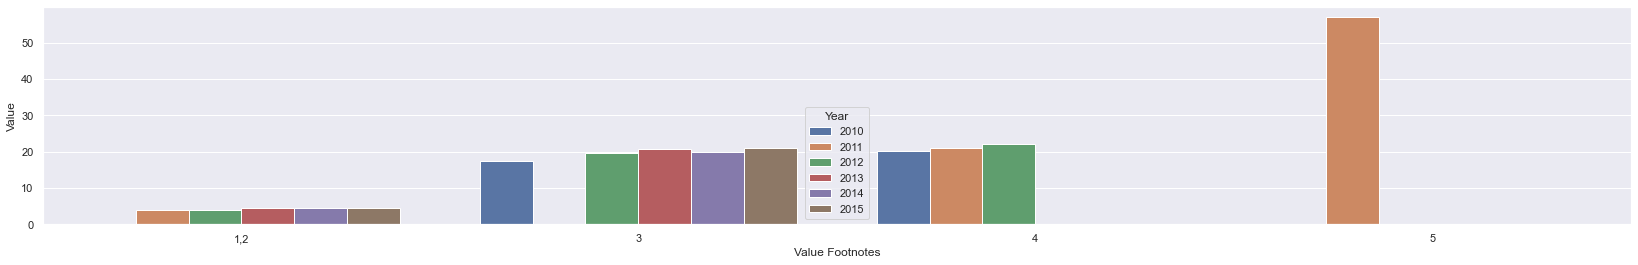

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
production = pd.read_csv('Data.csv')
 
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*60+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])


 
    

plt.legend(loc='upper right')
sns.barplot(production['Value Footnotes'],production['Value'],  production['Year'])

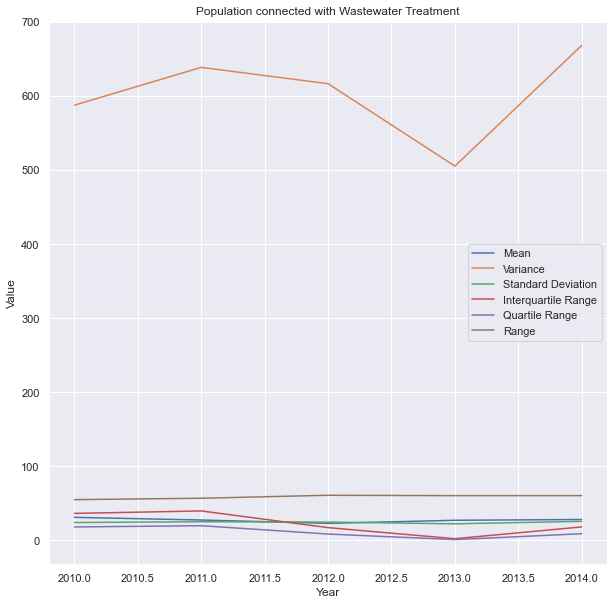

In [7]:
plt.figure(figsize=(10,10))

def interquartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return q3 - q1

def quartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return (q3 - q1)/2

def _range(sample):
    return sample.max() - sample.min()

def create_plot(fn, label):
    ls = []
    for year in range(2010,2015):
            ls.append(fn(production[production['Year'] == year]['Value']))
              
    plt.plot(range(2010,2015), ls, label=label)
    plt.title('Population connected with Wastewater Treatment')
    plt.ylabel('Value')
    plt.xlabel('Year')
    
create_plot(statistics.mean, 'Mean')
create_plot(statistics.variance, 'Variance')
create_plot(statistics.stdev, 'Standard Deviation')
create_plot(interquartile_range, 'Interquartile Range')
create_plot(quartile_range, 'Quartile Range')
create_plot(_range, 'Range')

plt.legend(loc='best')